# Country Distances 
This notebook objective is to create distance matrix between all the countries in the world : 
1. A Distance matrix in lat-long : DONE - Pickle + STD
2. An Adjacency matrix based on the physical borders : DONE 
3. A Distance matrix in number of hops (by the way of an adjacency matrix : DONE - Pickle + STD
4. A Neigbhor influence matrix : DONE - Pickle
5. A Distance Matrix based on the number of flight routes between countries : DONE - Pickle + STD

In [1]:
%pylab inline
import pandas as pd
import networkx as nx
import numpy as np 
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


## 1 -  Distance matrix 
As we know the avare coordinate of every country, we can set un a distance matrix between every country. We just have to be carefull with the extreme values of longitude as the earth is round. 

In [2]:
c_data = pickle.load(open('../DataEnriching/data.pickle','rb'))
c_data.drop(c_data.index[231],inplace=True)

In [3]:
c_latlng = np.array(c_data['latlng'])

In [4]:
c_distance = np.zeros([len(c_latlng),len(c_latlng)])
for i in range(len(c_latlng)):
    for j in range(len(c_latlng)):
        try:
            vect_ij = np.array(c_latlng[i])  -  np.array(c_latlng[j])
            # Handling the fact that the earth in round
            vect_ij[1] = min(abs(vect_ij[1]),abs( vect_ij[1]+360 ), abs(vect_ij[1] - 360))
            c_distance[i,j] = np.linalg.norm(vect_ij)
        except:
            print(i,j)
            c_distance[i,j] = np.nan

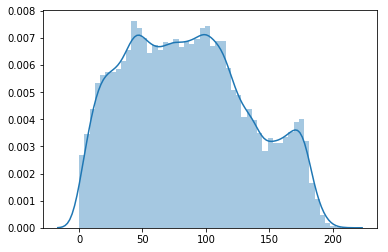

In [5]:
sns.distplot(c_distance.flatten())
std_scaler = StandardScaler().fit(c_distance)
c_distance = std_scaler.transform(c_distance)

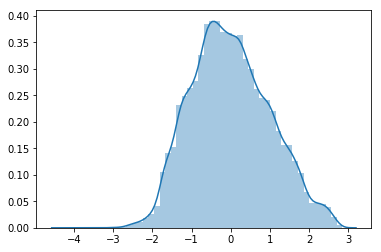

In [6]:
sns.distplot(c_distance.flatten())


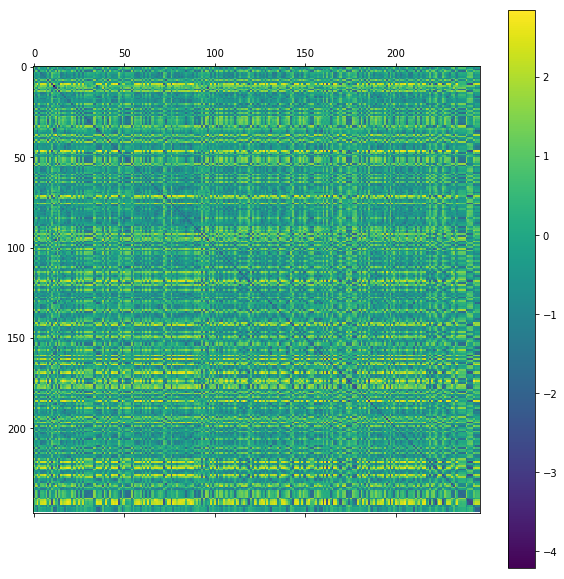

real_distance                                                    \
                AW        AF        AO        AI        AX        AL   
ISO2                                                                   
AW       -1.878979  1.394235  0.491524 -1.631013  0.564575  0.603555   
AF        0.955339 -1.807997 -0.217907  0.872113 -0.496352 -0.455059   
AO        0.029698 -0.281936 -1.935353  0.002041 -0.063883 -0.285057   
AI       -1.694089  1.218259  0.368315 -1.816604  0.376907  0.426259   
AX        0.232566 -0.573584 -0.018002  0.122019 -1.633942 -1.033417   
AL        0.080393 -0.735878 -0.522460 -0.019672 -1.220688 -1.449249   
AD       -0.269758 -0.301897 -0.415642 -0.377259 -1.083274 -1.045516   
AE        0.705869 -1.474609 -0.591214  0.628173 -0.560192 -0.622385   
AR       -0.905630  1.601758  0.315292 -0.727538  1.091636  1.000247   
AM        0.575296 -1.310951 -0.382864  0.482789 -0.938591 -0.905013   
AS        0.271337  1.327312  2.592305  0.511132  2.379919  2.439550   
AQ        0.697651  1.455317  0.168039  0.795404  1.639545  1.433287   
TF        1.281435  0.123820 -0.283008  1.279381  0.959065  0.786291   
AG       -1.684883  1.189796  0.323451 -1.778700  0.362533  0.404766   
AU        1.482910  0.319236  1.111454  1.725641  1.452163  1.419465   
AT       -0.004381 -0.550277 -0.349945 -0.110960 -1.323275 -1.249230   
AZ        0.628193 -1.361388 -0.340462  0.535923 -0.901961 -0.850969   
BI        0.222946 -0.621791 -1.549849  0.177266 -0.241506 -0.457144   
BE       -0.149302 -0.317223 -0.220168 -0.260786 -1.235933 -1.040742   
BJ       -0.378323 -0.236232 -1.213326 -0.441131 -0.475139 -0.662765   
BF       -0.467816 -0.167847 -1.071623 -0.537159 -0.510766 -0.674681   
BD        1.450821 -1.184727  0.183883  1.377749  0.070723  0.117653   
BG        0.191912 -0.840838 -0.460204  0.091879 -1.247853 -1.332111   
BH        0.638838 -1.431365 -0.612918  0.558831 -0.642524 -0.708943   
BS       -1.604745  1.505810  0.741339 -1.521360  0.579389  0.670494   
BA        0.060951 -0.675723 -0.443761 -0.041947 -1.283132 -1.370821   
BL       -1.694556  1.223421  0.376820 -1.809236  0.379314  0.430081   
BY        0.321962 -0.821405 -0.188137  0.216721 -1.400860 -1.135537   
BZ       -1.476723  1.817399  1.002829 -1.283022  0.890956  0.972040   
BM       -1.453194  1.235596  0.560780 -1.521248  0.291993  0.403851   
...            ...       ...       ...       ...       ...       ...   
TH        1.650252 -0.884790  0.335330  1.584583  0.353371  0.380510   
TJ        1.099038 -1.608957  0.006083  1.012770 -0.438701 -0.339042   
TK        0.285957  1.240789  2.540202  0.521579  2.295077  2.363506   
TM        0.879133 -1.606211 -0.168701  0.789995 -0.664130 -0.578895   
TL        1.557079 -0.074575  0.901973  1.789867  1.099894  1.096920   
TO        0.403733  1.269172  2.464509  0.646639  2.333070  2.377256   
TT       -1.690226  1.192306  0.253124 -1.658906  0.411967  0.429629   
TN       -0.179791 -0.494192 -0.682451 -0.277196 -1.022176 -1.165637   
TR        0.368718 -1.090349 -0.507740  0.274465 -1.072759 -1.120081   
TV        0.485678  1.011732  2.276936  0.719673  2.087445  2.149054   
TW        1.637915 -0.475634  0.932567  1.849524  0.690481  0.780442   
TZ        0.333929 -0.653824 -1.467192  0.290759 -0.167886 -0.376099   
UG        0.251475 -0.729737 -1.431349  0.199057 -0.329513 -0.540857   
UA        0.369600 -0.947727 -0.273170  0.267704 -1.278742 -1.135537   
UY       -0.890804  1.425080  0.104459 -0.738124  0.962956  0.858109   
US       -1.107411  1.993855  1.392418 -1.000148  0.937934  1.096577   
UZ        0.964682 -1.618880 -0.081317  0.875718 -0.594910 -0.492159   
VA       -0.062230 -0.557775 -0.490403 -0.165418 -1.208490 -1.283858   
VC       -1.696301  1.188315  0.275721 -1.704629  0.390895  0.417312   
VE       -1.754434  1.320333  0.360055 -1.594976  0.538014  0.554420   
VG       -1.713227  1.251722  0.406000 -1.786017  0.403333  0.455813   
VI       -1.718752  1.259168  0.412933 -1.779

In [7]:
plt.figure(num=1,figsize=[10,10])
plt.matshow(c_distance,fignum=1)
plt.colorbar()
plt.show()

real_distance_df = pd.DataFrame(c_distance,columns=[c_data['ISO2']], index = c_data['ISO2'])
real_distance_df.columns=pd.MultiIndex.from_tuples([('real_distance',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
real_distance_df.to_pickle('real_distance.pickle')
real_distance_df

## 2 - Adjacency Matrix
Here establish an adjacency matrix of the connected countries in term of borders (the only problem is that it won't be fully connected as Islands would stay alone. This is a usefull tool to create afterwards an neigborhood influence matrix. 

In [8]:
c_adj = np.zeros([len(c_data),len(c_data)])
for i in range(len(c_data)-1):
    for j in range(len(c_data)-1):
        if c_data['ISO3'].iloc[i] in set(c_data['borders'].iloc[j]) :
            c_adj[i,j] = 1
        else:
            c_adj[i,j] = 0

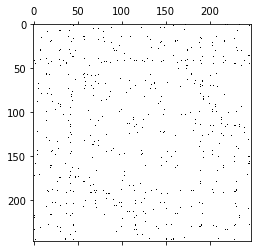

In [9]:
plt.spy(c_adj)

We wish to show the graph generated by the adjacency matrix, with the country names labels and their real coordinated (in lat/long)

In [10]:
c_pos = {}
for i in range(len(c_data)):
    c_pos[dict(c_data.reset_index()['ISO2'])[i]] = array(c_data.reset_index()['latlng'].iloc[i])[::-1]


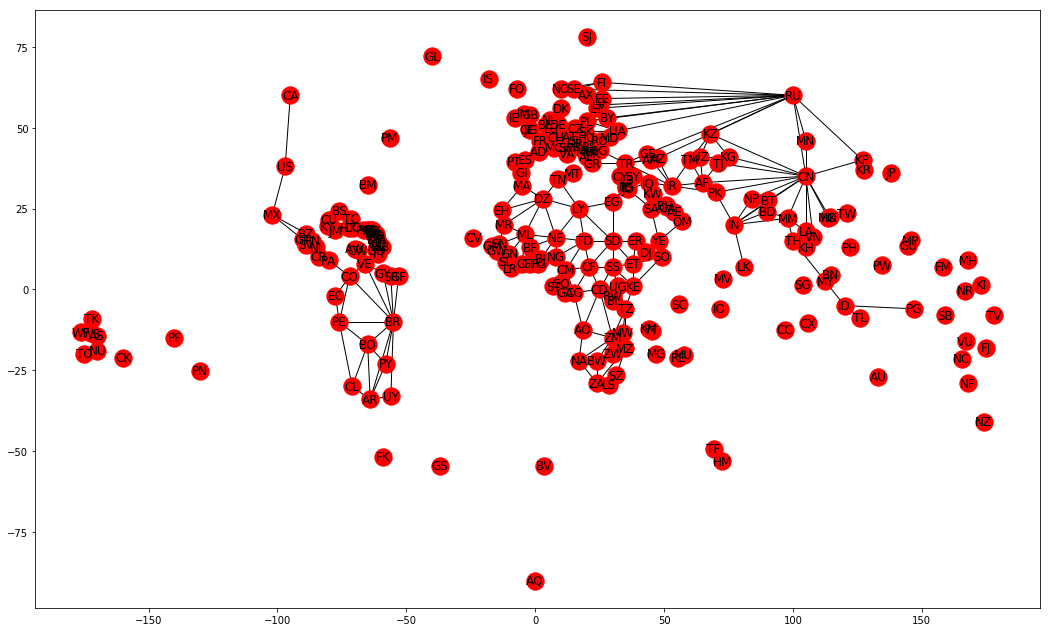

In [11]:
plt.figure(figsize=[18,11])
G = nx.Graph(c_adj)
G = nx.relabel_nodes(G,dict(c_data.reset_index()['ISO2']))
nx.draw_networkx(G,pos=c_pos) #,labels=dict(c_data.reset_index()['name'])

### 3 - Hop Matrix
Here we want find the number boders you have to cross in order to reach an other country. Here also we consider only physical borders.

In [12]:
shortest_path_c = dict(nx.all_pairs_shortest_path_length(G))
hop_matrix = np.zeros([len(c_data),len(c_data)])
c_iso2 = dict(c_data.reset_index()['ISO2'])
raw_hops ={}

for i in range(len(c_data)):
    for j in range(len(c_data)):
        try:
            raw_hops[(i,j)] = shortest_path_c[c_iso2[i]][c_iso2[j]]
        except:
            pass
        
std_scaler_hop = StandardScaler().fit(np.array(list(raw_hops.values())).reshape(-1, 1))
raw_hops = dict(zip(list(raw_hops.keys()),std_scaler_hop.transform(np.array(list(raw_hops.values())).reshape(-1, 1)))) 

for i in range(len(c_data)):
    for j in range(len(c_data)):
        try:
            hop_matrix[i][j] = raw_hops[(i,j)]
        except:
            hop_matrix[i][j] = np.inf


/Users/adrian/anaconda3/envs/ada/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
hop_matrix

array([[-1.98441788,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf, -1.98441788,  0.89953998, ...,  1.54041951,
         0.89953998,         inf],
       [        inf,  0.89953998, -1.98441788, ..., -1.34353835,
        -1.66397811,         inf],
       ..., 
       [        inf,  1.54041951, -1.34353835, ..., -1.98441788,
        -1.34353835,         inf],
       [        inf,  0.89953998, -1.66397811, ..., -1.34353835,
        -1.98441788,         inf],
       [        inf,         inf,         inf, ...,         inf,
                inf, -1.98441788]])

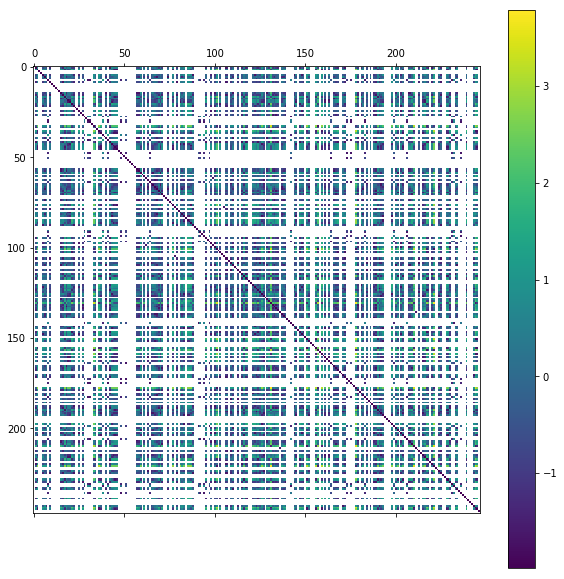

In [14]:
plt.figure(num=2,figsize=[10,10])
plt.matshow(hop_matrix,fignum=2)
plt.colorbar()
plt.show()

In [15]:
hop_distance_df = pd.DataFrame(hop_matrix,columns=[c_data['ISO2']], index = c_data['ISO2'])
hop_distance_df.columns=pd.MultiIndex.from_tuples([('hop_distance',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
hop_distance_df.to_pickle('hop_distance.pickle')
hop_distance_df


hop_distance                                                              \
               AW        AF        AO        AI        AX        AL        AD   
ISO2                                                                            
AW      -1.984418       inf       inf       inf       inf       inf       inf   
AF            inf -1.984418  0.899540       inf       inf -0.702659 -0.061779   
AO            inf  0.899540 -1.984418       inf       inf  0.899540  0.579100   
AI            inf       inf       inf -1.984418       inf       inf       inf   
AX            inf       inf       inf       inf -1.984418       inf       inf   
AL            inf -0.702659  0.899540       inf       inf -1.984418 -0.061779   
AD            inf -0.061779  0.579100       inf       inf -0.061779 -1.984418   
AE            inf -0.702659  0.579100       inf       inf -0.382219  0.899540   
AR            inf       inf       inf       inf       inf       inf       inf   
AM            inf -1.343538  0.579100       inf       inf -1.023099 -0.061779   
AS            inf       inf       inf       inf       inf       inf       inf   
AQ            inf       inf       inf       inf       inf       inf       inf   
TF            inf       inf       inf       inf       inf       inf       inf   
AG            inf       inf       inf       inf       inf       inf       inf   
AU            inf       inf       inf       inf       inf       inf       inf   
AT            inf -0.382219  1.219980       inf       inf -0.702659 -1.023099   
AZ            inf -1.343538  0.579100       inf       inf -1.023099 -0.382219   
BI            inf  0.899540 -1.343538       inf       inf  0.899540  0.579100   
BE            inf -0.382219  0.899540       inf       inf -0.061779 -1.343538   
BJ            inf  0.579100 -0.702659       inf       inf  0.579100 -0.382219   
BF            inf  0.579100 -0.382219       inf       inf  0.579100 -0.382219   
BD            inf -1.023099  1.540420       inf       inf -0.061779  0.258660   
BG            inf -1.023099  0.579100       inf       inf -1.343538 -0.061779   
BH            inf       inf       inf       inf       inf       inf       inf   
BS            inf       inf       inf       inf       inf       inf       inf   
BA            inf -0.382219  1.219980       inf       inf -1.343538 -0.382219   
BL            inf       inf       inf       inf       inf       inf       inf   
BY            inf -1.023099  1.219980       inf       inf -0.382219 -0.702659   
BZ            inf       inf       inf       inf       inf       inf       inf   
BM            inf       inf       inf       inf       inf       inf       inf   
...           ...       ...       ...       ...       ...       ...       ...   
TH            inf -1.023099  1.860859       inf       inf  0.258660  0.258660   
TJ            inf -1.663978  1.219980       inf       inf -0.382219 -0.061779   
TK            inf       inf       inf       inf       inf       inf       inf   
TM            inf -1.663978  0.899540       inf       inf -0.702659 -0.061779   
TL            inf -0.061779  2.822179       inf       inf  1.219980  1.219980   
TO            inf       inf       inf       inf       inf       inf       inf   
TT            inf       inf       inf       inf       inf       inf       inf   
TN            inf  0.258660 -0.382219       inf       inf  0.258660 -0.702659   
TR            inf -1.343538  0.258660       inf       inf -1.343538 -0.061779   
TV            inf       inf       inf       inf       inf       inf       inf   
TW            inf       inf       inf       inf       inf       inf       inf   
TZ            inf  0.899540 -1.343538       inf       inf  0.899540  0.579100   
UG            inf  0.579100 -1.343538       inf       inf  0.579100  0.258660   
UA            inf -1.023099  1.219980       inf       inf -0.702659 -0.702659   
UY            inf       inf       inf       inf       inf       inf       inf   
US            inf       inf       in

## 4 - Influence matrix 
We are going to weight the the adjacency matrix by the size of the country 

In [16]:
c_adj_df = pd.DataFrame(c_adj,index=c_data['ISO2'],columns=c_data['ISO2'])
c_data_iso2 = c_data.reset_index().set_index(c_data.ISO2)

In [31]:
neighbor_influence_matrix = pd.DataFrame(index=c_data['ISO2'],columns=c_data['ISO2'])
for i in range(len(c_data)):
    c_i = c_data['ISO2'].iloc[i]
    for j in range(len(c_data)):
        c_j = c_data['ISO2'].iloc[j]
        neighbor_influence_matrix.loc[c_i,c_j] = c_adj_df.loc[c_i,c_j]* ( c_data_iso2['area'].loc[c_j]/c_data_iso2['area'].loc[c_i])

neighbor_influence_matrix.columns = pd.MultiIndex.from_tuples([('neighbor_influence',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
neighbor_influence_matrix.to_pickle('neighbor_influence.pickle')
neighbor_influence_matrix

neighbor_influence                                                      \
                     AW       AF      AO AI AX AL AD AE       AR         AM   
ISO2                                                                          
AW                    0        0       0  0  0  0  0  0        0          0   
AF                    0        0       0  0  0  0  0  0        0          0   
AO                    0        0       0  0  0  0  0  0        0          0   
AI                    0        0       0  0  0  0  0  0        0          0   
AX                    0        0       0  0  0  0  0  0        0          0   
AL                    0        0       0  0  0  0  0  0        0          0   
AD                    0        0       0  0  0  0  0  0        0          0   
AE                    0        0       0  0  0  0  0  0        0          0   
AR                    0        0       0  0  0  0  0  0        0          0   
AM                    0        0       0  0  0  0  0  0        0          0   
AS                    0        0       0  0  0  0  0  0        0          0   
AQ                    0        0       0  0  0  0  0  0        0          0   
TF                    0        0       0  0  0  0  0  0        0          0   
AG                    0        0       0  0  0  0  0  0        0          0   
AU                    0        0       0  0  0  0  0  0        0          0   
AT                    0        0       0  0  0  0  0  0        0          0   
AZ                    0        0       0  0  0  0  0  0        0   0.343453   
BI                    0        0       0  0  0  0  0  0        0          0   
BE                    0        0       0  0  0  0  0  0        0          0   
BJ                    0        0       0  0  0  0  0  0        0          0   
BF                    0        0       0  0  0  0  0  0        0          0   
BD                    0        0       0  0  0  0  0  0        0          0   
BG                    0        0       0  0  0  0  0  0        0          0   
BH                    0        0       0  0  0  0  0  0        0          0   
BS                    0        0       0  0  0  0  0  0        0          0   
BA                    0        0       0  0  0  0  0  0        0          0   
BL                    0        0       0  0  0  0  0  0        0          0   
BY                    0        0       0  0  0  0  0  0        0          0   
BZ                    0        0       0  0  0  0  0  0        0          0   
BM                    0        0       0  0  0  0  0  0        0          0   
...                 ...      ...     ... .. .. .. .. ..      ...        ...   
TH                    0        0       0  0  0  0  0  0        0          0   
TJ                    0  4.55786       0  0  0  0  0  0        0          0   
TK                    0        0       0  0  0  0  0  0        0          0   
TM                    0  1.33626       0  0  0  0  0  0        0          0   
TL                    0        0       0  0  0  0  0  0        0          0   
TO                    0        0       0  0  0  0  0  0        0          0   
TT                    0        0       0  0  0  0  0  0        0          0   
TN                    0        0       0  0  0  0  0  0        0          0   
TR                    0        0       0  0  0  0  0  0        0  0.0379587   
TV                    0        0       0  0  0  0  0  0        0          0   
TW                    0        0       0  0  0  0  0  0        0          0   
TZ                    0        0       0  0  0  0  0  0        0          0   
UG                    0        0       0  0  0  0  0  0        0          0   
UA                    0        0       0  0  0  0  0  0        0          0   
UY                    0        0       0  0  0  0  0  0  15.3584          0   
US                    0        0       0  0  0  0  0  0        0          0   
UZ                    0  1.45782       0  0  0  0  0  0

## 5 - Distance Matrix based on the number of direct flights between countries 
We have found a dataset of 59036 routes between 3209 airports on 531 airlines in the world as of January 2012. In addition the that we are able so associate all the Airports to their country thanks to a second dataset. 

In [18]:
routes_col = ['Airline','Airline ID','Source airport','Source airport ID','Destination airport','Destination airport ID','Codeshare','Stops','Equipment']
routes = pd.read_csv('./FlightsData/routes.dat',header=None,names=routes_col)
airports_col = ['Airport ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz ','Type','Source']
airports = pd.read_csv('./FlightsData/airports.dat',header=None,names=airports_col)
countries = pd.read_csv('./FlightsData/countries.dat',header=None,names=['Country','Blup','ISO2','Blop']).drop(['Blup','Blop'],axis=1)

In [19]:
airports = pd.merge(airports,countries,on='Country')
airports = airports[['IATA','ISO2']].dropna().drop(airports.ISO2 == '\\N').reset_index().drop('index',axis=1).set_index('IATA')
airports.loc[airports.ISO2 == 'IV','ISO2'] = 'CI'
airports.loc[airports.ISO2 == 'AN','ISO2'] = 'AD'

In [20]:
r_start = pd.merge(routes[['Source airport']].rename_axis({'Source airport':'IATA'},axis=1),airports.reset_index(),how="left",on='IATA')
r_end = pd.merge(routes[['Destination airport']].rename_axis({'Destination airport':'IATA'},axis=1),airports.reset_index(),how="left",on='IATA')

routes = pd.merge(r_start.rename_axis({'IATA':'s_IATA','ISO2': 's_ISO2'},axis=1),r_end.rename_axis({'IATA':'e_IATA','ISO2': 'e_ISO2'},axis=1),right_index=True,left_index=True)

In [21]:
# Droping the Nan aiports and the airport codes
routes = routes.replace('\\N',np.nan)
routes = routes.drop(['s_IATA','e_IATA'],axis=1).dropna(axis=0)
# Droping the internal flights
routes = routes.loc[routes['e_ISO2'] != routes['s_ISO2']]


In [22]:
routes_weights = routes.reset_index().groupby(['s_ISO2','e_ISO2']).count()

routes_weights['links'] = routes_weights['index']
routes_weights.drop('index',axis=1,inplace = True)

In [23]:
routes_total_dep = routes.reset_index().groupby(['s_ISO2']).count()
routes_total_dep['total_dep'] = routes_total_dep['index']
routes_total_dep.drop(['e_ISO2'],axis=1,inplace=True)
routes_weights_dep = pd.merge(routes_weights.reset_index(),routes_total_dep.reset_index(),on='s_ISO2')
routes_weights_dep = routes_weights_dep.set_index(['s_ISO2','e_ISO2']).drop('index',axis=1)
routes_weights_dep['percentage'] = 100*routes_weights_dep['links']/routes_weights_dep['total_dep']
routes_weights = routes_weights_dep[['percentage']]


In [24]:
std_scaler = StandardScaler().fit(routes_weights.values.reshape(-1,1))
routes_weights['standardized'] = routes_weights.values.reshape(-1,1)

/Users/adrian/anaconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [25]:
routes_weights

percentage  standardized
s_ISO2 e_ISO2                          
AD     AG        1.190476      1.190476
       AI        2.380952      2.380952
       AW        4.761905      4.761905
       BB        1.190476      1.190476
       CA        1.190476      1.190476
       CO        2.380952      2.380952
       DE        1.190476      1.190476
       DM        5.952381      5.952381
       DO        7.142857      7.142857
       FR        8.333333      8.333333
       GP        1.190476      1.190476
       HT        1.190476      1.190476
       JM        2.380952      2.380952
       KN        3.571429      3.571429
       LC        1.190476      1.190476
       NL        4.761905      4.761905
       PA        2.380952      2.380952
       PR        3.571429      3.571429
       SR        1.190476      1.190476
       TT        3.571429      3.571429
       US       27.380952     27.380952
       VE        7.142857      7.142857
       VG        4.761905      4.761905
AE     AF        0.970874      0.970874
       AM        0.277393      0.277393
       AO        0.277393      0.277393
       AT        0.277393      0.277393
       AU        2.219140      2.219140
       AZ        0.277393      0.277393
       BD        1.386963      1.386963
...                   ...           ...
ZA     RW        1.459854      1.459854
       SA        0.729927      0.729927
       SC        1.459854      1.459854
       SG        2.919708      2.919708
       SN        2.189781      2.189781
       SZ        0.729927      0.729927
       TH        1.459854      1.459854
       TR        0.729927      0.729927
       TZ        1.459854      1.459854
       UG        0.729927      0.729927
       US        3.649635      3.649635
       ZM        5.109489      5.109489
       ZW        6.569343      6.569343
ZM     AE        2.564103      2.564103
       AO        2.564103      2.564103
       BW        2.564103      2.564103
       CD        5.128205      5.128205
       ET        5.128205      5.128205
       KE       15.384615     15.384615
       MW       15.384615     15.384615
       NL        7.692308      7.692308
       ZA       17.948718     17.948718
       ZW       25.641026     25.641026
ZW     BW        6.896552      6.896552
       ET        6.896552      6.896552
       KE       10.344828     10.344828
       MW        3.448276      3.448276
       TZ        3.448276      3.448276
       ZA       31.034483     31.034483
       ZM       37.931034     37.931034

[4378 rows x 2 columns]

In [26]:
routes_matrix = pd.DataFrame(index=c_data['ISO2'],columns=c_data['ISO2'])
for i in range(len(c_data)):
    c_i = c_data['ISO2'].iloc[i]
    for j in range(len(c_data)):
        c_j = c_data['ISO2'].iloc[j]
        try:
            routes_matrix.loc[c_i,c_j] = routes_weights['standardized'][c_i][c_j]
        except:
            routes_matrix.loc[c_i,c_j] = np.inf
routes_matrix.columns=pd.MultiIndex.from_tuples([('flight_routes',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])

routes_matrix.to_pickle('flight_routes.pickle')
routes_matrix

flight_routes                                                        \
                AW        AF        AO       AI   AX        AL        AD   
ISO2                                                                       
AW             inf       inf       inf      inf  inf       inf   6.81818   
AF             inf       inf       inf      inf  inf       inf       inf   
AO             inf       inf       inf      inf  inf       inf       inf   
AI             inf       inf       inf      inf  inf       inf        40   
AX             inf       inf       inf      inf  inf       inf       inf   
AL             inf       inf       inf      inf  inf       inf       inf   
AD          4.7619       inf       inf  2.38095  inf       inf       inf   
AE             inf  0.970874  0.277393      inf  inf       inf       inf   
AR             inf       inf       inf      inf  inf       inf       inf   
AM             inf       inf       inf      inf  inf       inf       inf   
AS             inf       inf       inf      inf  inf       inf       inf   
AQ             inf       inf       inf      inf  inf       inf       inf   
TF             inf       inf       inf      inf  inf       inf       inf   
AG             inf       inf       inf  2.85714  inf       inf   2.85714   
AU             inf       inf       inf      inf  inf       inf       inf   
AT             inf       inf       inf      inf  inf  0.268817       inf   
AZ             inf   1.49254       inf      inf  inf       inf       inf   
BI             inf       inf       inf      inf  inf       inf       inf   
BE             inf       inf  0.977995      inf  inf       inf       inf   
BJ             inf       inf       inf      inf  inf       inf       inf   
BF             inf       inf       inf      inf  inf       inf       inf   
BD             inf       inf       inf      inf  inf       inf       inf   
BG             inf       inf       inf      inf  inf       inf       inf   
BH             inf       inf       inf      inf  inf       inf       inf   
BS             inf       inf       inf      inf  inf       inf       inf   
BA             inf       inf       inf      inf  inf       inf       inf   
BL             inf       inf       inf      inf  inf       inf       inf   
BY             inf       inf       inf      inf  inf       inf       inf   
BZ             inf       inf       inf      inf  inf       inf       inf   
BM             inf       inf       inf      inf  inf       inf       inf   
...            ...       ...       ...      ...  ...       ...       ...   
TH             inf       inf       inf      inf  inf       inf       inf   
TJ             inf       inf       inf      inf  inf       inf       inf   
TK             inf       inf       inf      inf  inf       inf       inf   
TM             inf       inf       inf      inf  inf       inf       inf   
TL             inf       inf       inf      inf  inf       inf       inf   
TO             inf       inf       inf      inf  inf       inf       inf   
TT             inf       inf       inf      inf  inf       inf   8.10811   
TN             inf       inf       inf      inf  inf       inf       inf   
TR             inf    0.3003       inf      inf  inf    0.3003       inf   
TV             inf       inf       inf      inf  inf       inf       inf   
TW             inf       inf       inf      inf  inf       inf       inf   
TZ             inf       inf       inf      inf  inf       inf       inf   
UG             inf       inf       inf      inf  inf       inf       inf   
UA             inf       inf       inf      inf  inf       inf       inf   
UY             inf       inf       inf      inf  inf       inf       inf   
US        0.849171       inf       inf      inf  inf       inf  0.970481   
UZ             inf       inf       inf      inf  inf       inf       inf   
VA             inf       inf       inf      inf  inf       inf       inf   
VC             inf       inf       inf      inf  inf 

In [27]:
dict_routes = routes_weights['standardized'].to_dict()
RG = nx.Graph()
RG.add_nodes_from(c_data['ISO2'].values.tolist())
for t in dict_routes.keys():
    RG.add_edge(*t,weight=dict_routes[t])

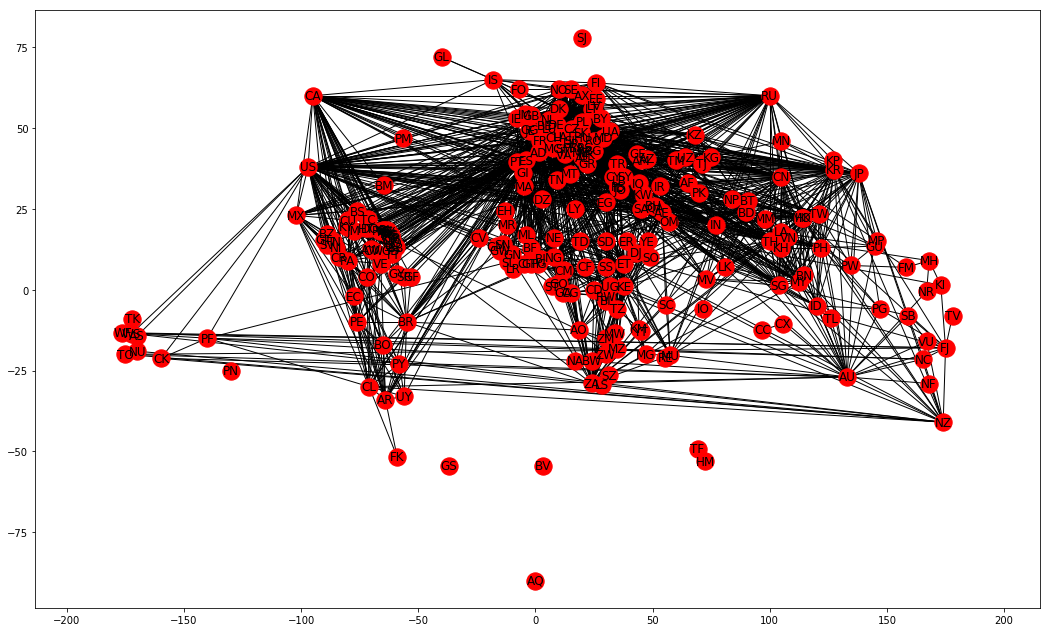

In [28]:
plt.figure(figsize=[18,11])
nx.draw_networkx(RG,pos=c_pos)

In [29]:
RG.edges(data=True)

EdgeDataView([('AW', 'AD', {'weight': 6.8181818181818183}), ('AW', 'CA', {'weight': 0.29239766081871343}), ('AW', 'CO', {'weight': 1.6666666666666667}), ('AW', 'DO', {'weight': 1.2578616352201257}), ('AW', 'NL', {'weight': 0.35523978685612789}), ('AW', 'PA', {'weight': 0.92592592592592593}), ('AW', 'SR', {'weight': 10.0}), ('AW', 'US', {'weight': 0.84917104731095838}), ('AW', 'VE', {'weight': 16.666666666666668}), ('AF', 'AE', {'weight': 24.137931034482758}), ('AF', 'AZ', {'weight': 1.4925373134328359}), ('AF', 'IN', {'weight': 1.7114914425427872}), ('AF', 'IR', {'weight': 4.3859649122807021}), ('AF', 'KW', {'weight': 0.86206896551724133}), ('AF', 'PK', {'weight': 2.5}), ('AF', 'TJ', {'weight': 3.4482758620689653}), ('AF', 'TR', {'weight': 0.3003003003003003}), ('AO', 'AE', {'weight': 6.8965517241379306}), ('AO', 'BR', {'weight': 1.0050251256281406}), ('AO', 'CD', {'weight': 13.793103448275861}), ('AO', 'CG', {'weight': 2.9411764705882355}), ('AO', 'CN', {'weight': 0.084388185654008435

In [56]:
c_data_iso2.loc['']

name                                                               France
area                                                               551695
ISO2                                                                   FR
ISO3                                                                  FRA
languages                                                        [French]
borders                          [AND, BEL, DEU, ITA, LUX, MCO, ESP, CHE]
latlng                                                            [46, 2]
language_codes                                                      [fra]
POP                                                           6.27226e+07
religion                {'Christianism': 0.7019, 'Non-religious': 0.1915}
2016_gdp_total                                                2.46545e+12
2016_gdp_capita                                                     36855
gov_type                                            presidential republic
Active tweeter users                  